In [1]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import skimage.measure
import math
from matplotlib import pyplot as plt


In [5]:
def bone_mineral_content(image,roi):
    
    i_d = np.sum(roi)
    
    image_width,image_height = image.size
    
    roi_width,roi_height = roi.size
    
    c_f = image_height/roi_height
    
    bone_mineral_content = (i_d * 1.073)/c_f
    
    return bone_mineral_content

In [6]:
def volume_of_roi(roi):
    
    width,height = roi.size
    
    diagonal = math.sqrt(pow(width,2)+pow(height,2))
    
    a = 3.14*(pow(diagonal/2,2))
    
    entropy = skimage.measure.shannon_entropy(roi)
    
    volume_of_roi = a*entropy
    
    return volume_of_roi 

In [7]:
def bone_mineral_density(image,roi):
    
    bmc = bone_mineral_content(image,roi)
    
    vol_roi = volume_of_roi(roi)
    
    bmd = bmc/vol_roi
    
    return bmd

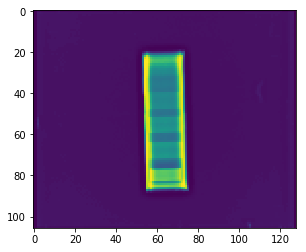

In [8]:
low_image = Image.open("X-Rays/70_40.bmp")
plt.imshow(low_image)

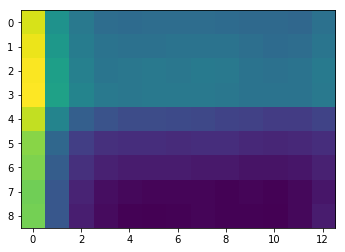

In [9]:
left = 57
top = 68
right = 70
bottom = 77
low_cropped_img = low_image.crop((left,top,right,bottom))
plt.imshow(low_cropped_img)

In [10]:
bmd = bone_mineral_density(low_image,low_cropped_img)

In [11]:
bmd 

1.0344770957421248

### 2nd Region

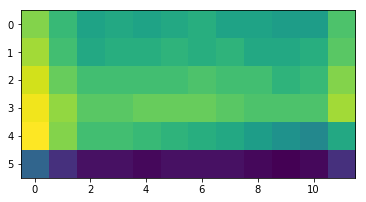

In [44]:
left = 58
top = 55
right = 70
bottom = 61
mid_cropped_img = low_image.crop((left,top,right,bottom))
plt.imshow(mid_cropped_img)

In [45]:
bmd_2 = bone_mineral_density(low_image,mid_cropped_img)

In [46]:
bmd_2

0.8055813278625129

### 3rd Region

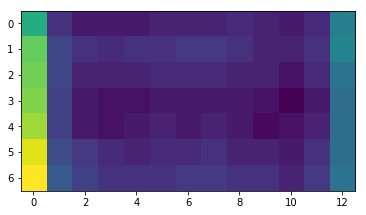

In [47]:
left = 57
top = 40
right = 70
bottom = 47
high_cropped_img = low_image.crop((left,top,right,bottom))
plt.imshow(high_cropped_img)

In [48]:
bmd_3 = bone_mineral_density(low_image,high_cropped_img)

In [49]:
bmd_3

1.112293018496206

In [50]:
b_m_d = (bmd + bmd_2 + bmd_3) / 3

In [51]:
b_m_d

0.9841171473669479